# Logistic Regression

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Glossary:
1. age: age of subject
2. anaemia: whether a persson is anaemic or not -> 0 or 1 -> Boolean -> anaemia=decrease in rbc or haemoglobin
3. CPK: creatine phophokinase: level of CPK enzyme in blood -> unit: mcg/L
4. diabetes: if subject is diabetic -> boolean
5. ejection fraction: percentage of blood leaving the heart at each contraction
6. high BP: if the subject has hypertension or not -> boolean
7. platelets: count of platelets in per mL of blood
8. serum creating: level of serum creatine in the blood mg/dL
9. serum sodium: level of serum sodium in blood
10. sex: gender of subject
11. smoking: whether subject smokes or not -> boolean
12. time (int) – Follow-up period (days).
13. DEATH_EVENT (int) – Target variable indicating if the subject died (1 = Yes, 0 = No).

#### DEATH_EVENT is the target variable

In [6]:
df = pd.read_csv(r"heart_ds\heart_failure_clinical_records_dataset.csv")

In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
X = df.drop(columns=['DEATH_EVENT'])

In [10]:
y = df['DEATH_EVENT']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

I used stratify=y while splitting the data to ensure that the distribution of the target variable (DEATH_EVENT) remains the same in both the training and test sets.

## Why is Stratification Important?

#### Handles Imbalanced Data
If the dataset has more survivors (0s) than deaths (1s), a random split might result in an imbalanced training set.
Stratified splitting ensures both sets have the same proportion of deaths and survivors as the original dataset.

#### Prevents Bias
Without stratification, the training or test set might have very few death cases, leading to poor generalization.
Stratification ensures the model learns from both classes effectively.

#### Better Model Evaluation
If the test set has a different distribution from the training set, the performance metrics (log loss, accuracy) might be misleading.
Stratification ensures a fairer and more representative evaluation.

The dataset is imbalanced, with:

67.89% of patients surviving (DEATH_EVENT = 0)
32.11% of patients dying (DEATH_EVENT = 1)
Since there are more survivors than deaths, stratification was necessary to maintain this proportion in both training and test sets.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
y_pred = logreg.predict_proba(X_test_scaled)


In [23]:
logloss = log_loss(y_test, y_pred)
logloss

0.4415521599248687

## Log Loss

The log loss (0.4415) indicates how well our logistic regression model predicts the probability of death events. Here's what it tells us:

#### Lower is Better
Log loss measures how close the predicted probabilities are to the actual class labels. A perfect model would have a log loss close to 0, while a random guess (50-50 probability) would have a higher log loss.

#### Interpreting 0.4415
Since log loss is a negative log-likelihood, 0.4415 suggests that our model is making fairly good probabilistic predictions.
If we had a log loss > 1, it would mean our predictions are way off.
If it was < 0.1, we’d have an extremely confident model.

In [30]:
y_pred_labels = (y_pred[:, 1] >= 0.5).astype(int)
y_pred_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

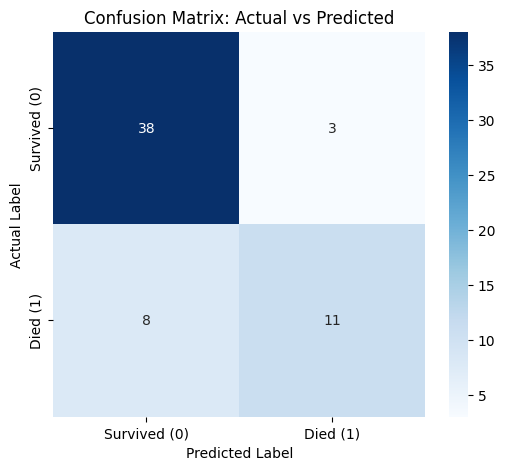

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Survived (0)", "Died (1)"], yticklabels=["Survived (0)", "Died (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix: Actual vs Predicted")
plt.show()

1. True Negatives (TN) = 38 → 38 patients who survived were correctly predicted as survivors. 
2. False Positives (FP) = 3 → 3 patients who survived were wrongly predicted as deaths. 
3. False Negatives (FN) = 8 → 8 patients who died were wrongly predicted as survivors. 
4. True Positives (TP) = 11 → 11 patients who died were correctly predicted as deaths. 

## What is a Decision Threshold?
In logistic regression, the model outputs probabilities instead of direct class labels. The decision threshold is the probability cutoff used to classify predictions into Survived (0) or Died (1).

1. Default Threshold (0.5)
2. If P(Death) ≥ 0.5 → Predict 1 (Died)
3. If P(Death) < 0.5 → Predict 0 (Survived)

#### Why Adjust the Threshold?
Lowering the threshold (< 0.5):
Increases sensitivity (recall) → Fewer false negatives (FN)
Useful if missing actual deaths is costly (e.g., in healthcare).
Raising the threshold (> 0.5):
Increases precision → Fewer false positives (FP)
Useful if false alarms should be minimized.